Getest op huidige effecten waarvan we de data al hadden, kan altijd nog uitgebreid worden als we corrigeren voor meer effecten zodra we deze identificeren 

# Data Prep

Allemaal opnieuw gedaan omdat er nieuwe segmentation gedaan is

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from causalimpact import CausalImpact
from datetime import timedelta
from datetime import timedelta

In [38]:
loyal_customers = pd.read_csv('../loyal_customer_data.csv')
loyal_customers

,Unnamed: 0,store_code,date_code,period_code,redeemer_latest_ind,customer_code,customer_segment_level_1_code,customer_segment_level_2_code,revenue_after_discount_incl_vat,quantity_sold,store_type_new
0,0,313,2022-03-21,4,0,1451810,2.0,2.0,729.0,6.000,Daily
1,2,420,2022-02-05,4,0,1287290,1.0,1.0,2221.0,9.150,Hypermarket
2,3,234,2020-09-14,1,1,1270550,3.0,6.0,4104.0,17.934,Hypermarket
3,4,317,2021-07-16,3,0,1224560,3.0,6.0,6539.0,29.580,Daily
4,5,215,2021-01-27,2,0,1220570,1.0,1.0,6751.0,26.240,Hypermarket
...,...,...,...,...,...,...,...,...,...,...,...
1714845,3252959,234,2022-03-05,4,1,880230,3.0,6.0,6889.0,19.796,Hypermarket
1714846,3252960,344,2022-03-21,4,1,1427520,1.0,1.0,10462.0,15.934,Hypermarket
1714847,3252962,243,2021-10-07,3,1,1282760,1.0,1.0,10600.0,38.951,Hypermarket
1714848,3252963,212,2021-01-11,2,1,1250250,1.0,1.0,3110.0,7.876,Hypermarket


In [39]:
lc_period34 = loyal_customers[(loyal_customers['period_code'] == 3) | (loyal_customers['period_code'] ==4)]
lc_period4 = loyal_customers[loyal_customers['period_code'] ==4]
lc_period3 = loyal_customers[loyal_customers['period_code'] ==3]
lc_period12 = loyal_customers[(loyal_customers['period_code'] == 1) | (loyal_customers['period_code'] ==2)]
lc_period12_from_34 = lc_period12[lc_period12['customer_code'].isin(lc_period34['customer_code'])]
lc_period12_from_34

,Unnamed: 0,store_code,date_code,period_code,redeemer_latest_ind,customer_code,customer_segment_level_1_code,customer_segment_level_2_code,revenue_after_discount_incl_vat,quantity_sold,store_type_new
2,3,234,2020-09-14,1,1,1270550,3.0,6.0,4104.0,17.934,Hypermarket
4,5,215,2021-01-27,2,0,1220570,1.0,1.0,6751.0,26.240,Hypermarket
5,6,269,2020-10-14,1,1,1218130,1.0,1.0,4990.0,17.542,Hypermarket
6,7,279,2021-01-15,2,0,1166510,3.0,6.0,3660.0,7.664,Hypermarket
8,9,395,2021-02-27,2,0,974610,3.0,6.0,2278.0,9.064,Hypermarket
...,...,...,...,...,...,...,...,...,...,...,...
1714840,3252948,344,2020-09-17,1,1,1427520,1.0,1.0,4059.0,14.312,Hypermarket
1714842,3252953,401,2021-01-22,2,1,170260,3.0,6.0,1992.0,16.881,Daily
1714843,3252954,234,2020-08-28,1,0,1244460,3.0,6.0,5001.0,14.270,Hypermarket
1714844,3252955,356,2020-12-01,2,0,1244460,3.0,6.0,1484.0,4.000,Hypermarket


In [40]:
lc_period12_from_34.sort_values(by='date_code', inplace=True)
lc_period12_from_34.reset_index(inplace=True)
lc_period12_from_34

,index,Unnamed: 0,store_code,date_code,period_code,redeemer_latest_ind,customer_code,customer_segment_level_1_code,customer_segment_level_2_code,revenue_after_discount_incl_vat,quantity_sold,store_type_new
0,1621481,3075182,209,2020-06-29,1,0,978370,3.0,6.0,2042.0,13.000,Hypermarket
1,928147,1759407,210,2020-06-29,1,0,1258520,1.0,1.0,12307.0,18.476,Hypermarket
2,161209,305209,228,2020-06-29,1,1,1271850,1.0,1.0,6857.0,36.698,Hypermarket
3,776556,1471442,224,2020-06-29,1,0,1143320,3.0,6.0,174.0,1.020,Hypermarket
4,1471047,2789360,226,2020-06-29,1,0,1418870,2.0,2.0,161.0,1.000,Hypermarket
...,...,...,...,...,...,...,...,...,...,...,...,...
847351,451129,855117,348,2021-04-04,2,1,1447240,3.0,6.0,5737.0,24.248,Hypermarket
847352,162085,306866,385,2021-04-04,2,0,29750,3.0,6.0,861.0,5.904,Other
847353,729115,1381779,366,2021-04-04,2,0,1091170,2.0,2.0,543.0,2.000,Hypermarket
847354,90196,170638,319,2021-04-04,2,0,1450640,1.0,1.0,4402.0,26.000,Daily


In [41]:
lc_34_with_lp = lc_period34[lc_period34['redeemer_latest_ind'] == 1]
lc_34_without_lp = lc_period34[lc_period34['redeemer_latest_ind'] == 0]
lc_4_with_lp = lc_period4[lc_period4['redeemer_latest_ind'] == 1]
lc_4_without_lp = lc_period4[lc_period4['redeemer_latest_ind'] == 0]
print('made use:',len(lc_4_with_lp['customer_code'].unique())), print('did not make use:', len(lc_4_without_lp['customer_code'].unique()))

made use: 4078
did not make use: 4776


(None, None)

In [42]:
lc_34_with_lp['revenue_after_discount_incl_vat']

7           3070.0
11          8182.0
13          3268.0
21          4058.0
26          1089.0
            ...   
1714836      430.0
1714841     6306.0
1714845     6889.0
1714846    10462.0
1714847    10600.0
Name: revenue_after_discount_incl_vat, Length: 472195, dtype: float64

In [21]:
lc_34_with_lp

,Unnamed: 0,store_code,date_code,period_code,redeemer_latest_ind,customer_code,customer_segment_level_1_code,customer_segment_level_2_code,revenue_after_discount_incl_vat,quantity_sold,store_type_new
7,8,279,2021-11-26,4,1,1059050,3.0,6.0,3070.0,11.280,Hypermarket
11,13,364,2021-09-16,3,1,1443870,1.0,1.0,8182.0,58.232,Hypermarket
13,17,391,2021-10-25,3,1,1292750,1.0,1.0,3268.0,4.222,Hypermarket
21,30,273,2021-07-18,3,1,1178450,1.0,1.0,4058.0,19.000,Hypermarket
26,36,419,2021-07-18,3,1,1234570,3.0,6.0,1089.0,7.142,Daily
...,...,...,...,...,...,...,...,...,...,...,...
1714836,3252939,401,2021-07-03,3,1,170260,3.0,6.0,430.0,3.000,Daily
1714841,3252949,344,2021-07-26,3,1,1427520,1.0,1.0,6306.0,18.900,Hypermarket
1714845,3252959,234,2022-03-05,4,1,880230,3.0,6.0,6889.0,19.796,Hypermarket
1714846,3252960,344,2022-03-21,4,1,1427520,1.0,1.0,10462.0,15.934,Hypermarket


In [43]:
daily_revenue_with = lc_34_with_lp.groupby('date_code')['revenue_after_discount_incl_vat'].sum().reset_index()
daily_revenue_without = lc_34_without_lp.groupby('date_code')['revenue_after_discount_incl_vat'].sum().reset_index()
revenue_df_with = pd.DataFrame({'date': daily_revenue_with['date_code'], 'revenue': daily_revenue_with['revenue_after_discount_incl_vat']})
revenue_df_without = pd.DataFrame({'date': daily_revenue_without['date_code'], 'revenue': daily_revenue_without['revenue_after_discount_incl_vat']})
revenue_df_with['date'] = pd.to_datetime(revenue_df_with['date'])
revenue_df_without['date'] = pd.to_datetime(revenue_df_without['date'])


In [44]:
revenue_df_without.rename(columns={'revenue': 'revenue_without'})


,date,revenue_without
0,2021-06-28,3126528.03
1,2021-06-29,2878017.28
2,2021-06-30,3106214.77
3,2021-07-01,3126854.11
4,2021-07-02,4059050.58
...,...,...
275,2022-03-30,2754026.71
276,2022-03-31,2765346.68
277,2022-04-01,3617783.94
278,2022-04-02,3590320.38


In [45]:
revenue_df_with.rename(columns={'revenue': 'revenue_with'})

,date,revenue_with
0,2021-06-28,5393629.42
1,2021-06-29,5520279.17
2,2021-06-30,5627010.40
3,2021-07-01,6186093.92
4,2021-07-02,7232717.65
...,...,...
275,2022-03-30,5897735.65
276,2022-03-31,6157865.26
277,2022-04-01,8065175.57
278,2022-04-02,7490171.63


In [46]:
ts_pre_period = [pd.to_datetime(date) for date in ['2021-06-28', '2021-11-14']]
ts_post_period = [pd.to_datetime(date) for date in ['2021-11-15', '2022-04-03']]
ts_pre_period = [date.strftime('%Y-%m-%d') for date in ts_pre_period]
ts_post_period = [date.strftime('%Y-%m-%d') for date in ts_post_period]
print(ts_pre_period)
print(ts_post_period)

['2021-06-28', '2021-11-14']
['2021-11-15', '2022-04-03']


# Adding effects 

### Adding S&P Index to data

In [47]:
sp = pd.read_csv('../Download Data - INDEX_US_S&P US_SPX.csv')
sp = sp[['Date', 'Close']]
sp = sp.rename(columns={'Date': 'date', 'Close': 'close'})
sp['close'] = sp['close'].str.replace(',', '').astype(float)
sp.sort_values(by='date', inplace=True)
sp['date'] = pd.to_datetime(sp['date'], format='%m/%d/%Y')
sp['date'].dt.strftime('%Y-%m-%d')
sp.sort_values(by='date')
sp.set_index('date', inplace=True)

In [48]:
all_days = pd.date_range(min(revenue_df_without['date']), max(revenue_df_without['date']), freq='D')
all_days_df = pd.DataFrame(index=all_days)
all_days_df.index = pd.to_datetime(all_days_df.index)

In [49]:
sp_full = pd.merge(all_days_df, sp, how='outer', left_index=True, right_index=True)
sp_full.fillna(method='ffill', inplace=True)

In [50]:
sp_full


,close
2021-06-28,4290.61
2021-06-29,4291.80
2021-06-30,4297.50
2021-07-01,4319.94
2021-07-02,4352.34
...,...
2022-03-30,4602.45
2022-03-31,4530.41
2022-04-01,4545.86
2022-04-02,4545.86


In [51]:
ts_data_redeemer = pd.merge(revenue_df_with, sp_full, how='outer', left_on='date', right_index=True)
ts_data_non_redeemer = pd.merge(revenue_df_without, sp_full, how='outer', left_on='date', right_index=True)

In [52]:
ts_data_non_redeemer

,date,revenue,close
0,2021-06-28,3126528.03,4290.61
1,2021-06-29,2878017.28,4291.80
2,2021-06-30,3106214.77,4297.50
3,2021-07-01,3126854.11,4319.94
4,2021-07-02,4059050.58,4352.34
...,...,...,...
275,2022-03-30,2754026.71,4602.45
276,2022-03-31,2765346.68,4530.41
277,2022-04-01,3617783.94,4545.86
278,2022-04-02,3590320.38,4545.86


In [53]:
ts_data_redeemer

,date,revenue,close
0,2021-06-28,5393629.42,4290.61
1,2021-06-29,5520279.17,4291.80
2,2021-06-30,5627010.40,4297.50
3,2021-07-01,6186093.92,4319.94
4,2021-07-02,7232717.65,4352.34
...,...,...,...
275,2022-03-30,5897735.65,4602.45
276,2022-03-31,6157865.26,4530.41
277,2022-04-01,8065175.57,4545.86
278,2022-04-02,7490171.63,4545.86


### Adding counts to data

In [54]:
g_trends = pd.read_csv('../multiTimeline(3).csv')
g_trends = g_trends.iloc[1:]
g_trends.rename(columns={'Categorie: Alle categorieën': 'searches'}, inplace=True)
g_trends.index = pd.to_datetime(g_trends.index)
g_trends['searches'] = g_trends['searches'].astype(int)
g_trends.sort_index()

,searches
2021-07-04,67
2021-07-11,68
2021-07-18,77
2021-07-25,70
2021-08-01,66
2021-08-08,59
2021-08-15,71
2021-08-22,66
2021-08-29,66
2021-09-05,55


In [55]:
searches_full = pd.merge(all_days_df, g_trends , how='outer', left_index=True, right_index=True)
searches_full['searches'].fillna(method='ffill', limit=6, inplace=True)
searches_full['searches'].iloc[:7] = 45.0

In [56]:
ts_data_non_redeemer = pd.merge(ts_data_non_redeemer, searches_full, how='outer', left_on='date', right_index=True)
ts_data_redeemer = pd.merge(ts_data_redeemer, searches_full, how='outer', left_on='date', right_index=True)

### Adding revenue of loyal customers in periods 1 & 2

In [57]:
lc_period12 = loyal_customers[(loyal_customers['period_code'] == 1) | (loyal_customers['period_code'] ==2)]
lcr_12 = lc_period12[lc_period12['redeemer_latest_ind'] == 1]
lcr_12['date_code'] = pd.to_datetime(lcr_12['date_code'], format='%Y-%m-%d')

C:\Users\maxma\AppData\Local\Temp\ipykernel_21000\39362372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcr_12['date_code'] = pd.to_datetime(lcr_12['date_code'], format='%Y-%m-%d')


In [58]:
lcr_12['date_code'] =lcr_12['date_code'] + pd.offsets.DateOffset(years=1)
lcr_12['date_code'] = lcr_12['date_code'] - timedelta(days=1)
revenue_loyal_12_with = lcr_12.groupby('date_code')['revenue_after_discount_incl_vat'].sum().reset_index()
revenue_loyal_12_with.set_index('date_code', inplace=True)
revenue_loyal_12_with

C:\Users\maxma\AppData\Local\Temp\ipykernel_21000\4057676857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcr_12['date_code'] =lcr_12['date_code'] + pd.offsets.DateOffset(years=1)
C:\Users\maxma\AppData\Local\Temp\ipykernel_21000\4057676857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcr_12['date_code'] = lcr_12['date_code'] - timedelta(days=1)


,revenue_after_discount_incl_vat
date_code,
2021-06-28,4956504.09
2021-06-29,5269910.69
2021-06-30,5809338.42
2021-07-01,5487706.57
2021-07-02,6241568.58
...,...
2022-03-30,5922999.77
2022-03-31,5617071.67
2022-04-01,7750856.34


In [59]:
ts_data_non_redeemer = pd.merge(ts_data_non_redeemer, revenue_loyal_12_with, how='outer', left_on='date', right_index=True)
ts_data_redeemer = pd.merge(ts_data_redeemer, revenue_loyal_12_with, how='outer', left_on='date', right_index=True)

# Causal Impact

### non-redeemer

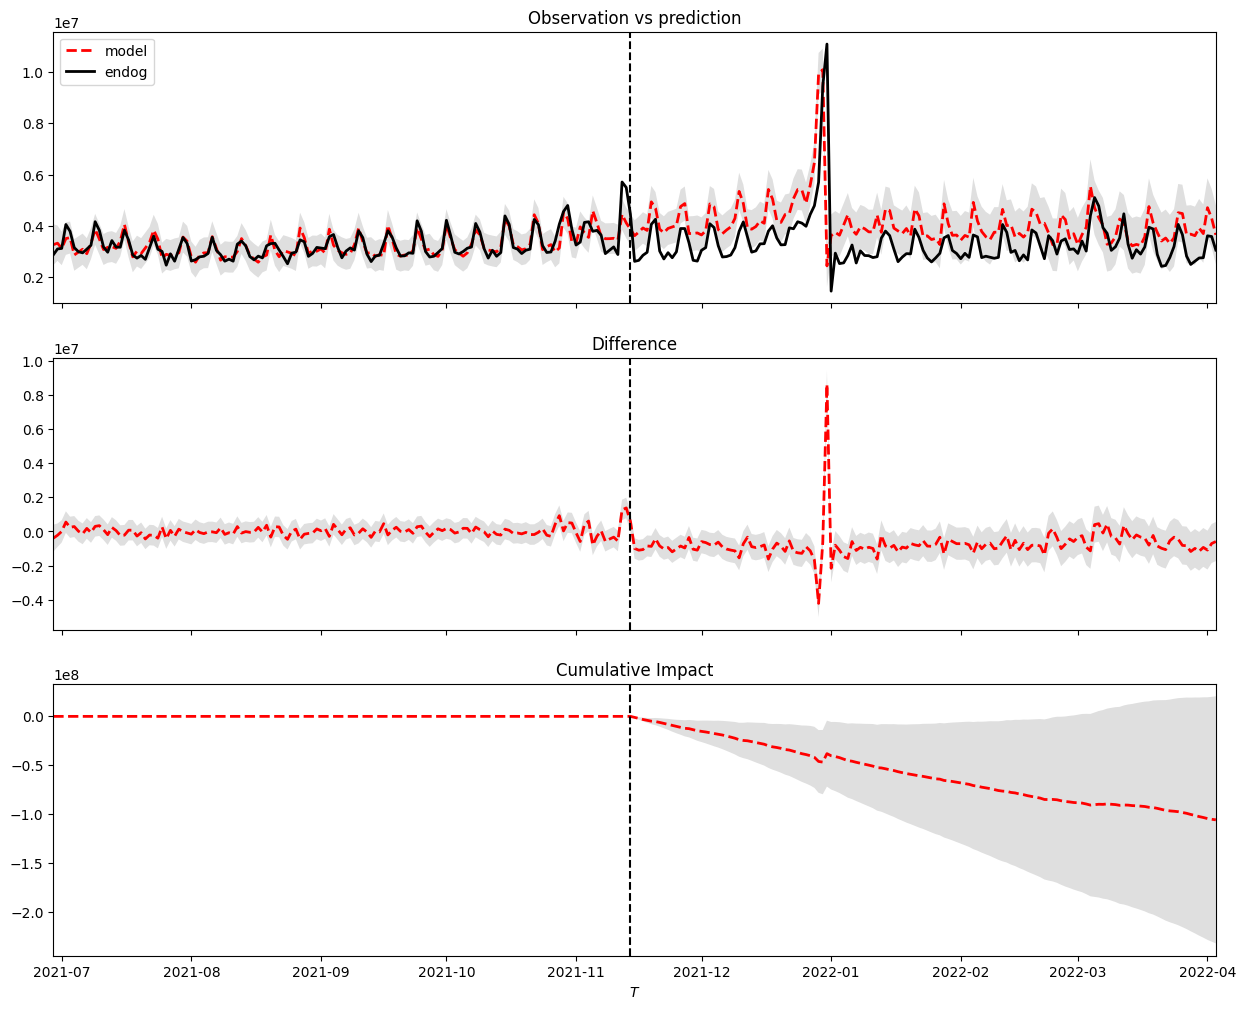

During the post-intervention period, the response             variable had an average value of             approx.
3367824.  By contrast, in  the absence of an intervention, we would have expected an average response of 4123028. The
95% interval of this counterfactual prediction is [3221347, 5024708]. Subtracting this prediction from the observed
response yields an estimate of the causal effect the intervention had on the response variable. This effect is -755203
with a 95% interval of [146476, -1656884]. For a discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 471495390.  By contrast, had  the intervention not taken
place, we would have expected a sum of 577223936. The 95% interval of this prediction is [450988615, 703459258]


 The above results are given in terms of absolute numbers. In relative term

In [66]:
ts_impact = CausalImpact(ts_data_non_redeemer, ts_pre_period, ts_post_period)
ts_impact.run()
ts_impact.plot()
ts_impact.summary(output="report")

### Redeemers

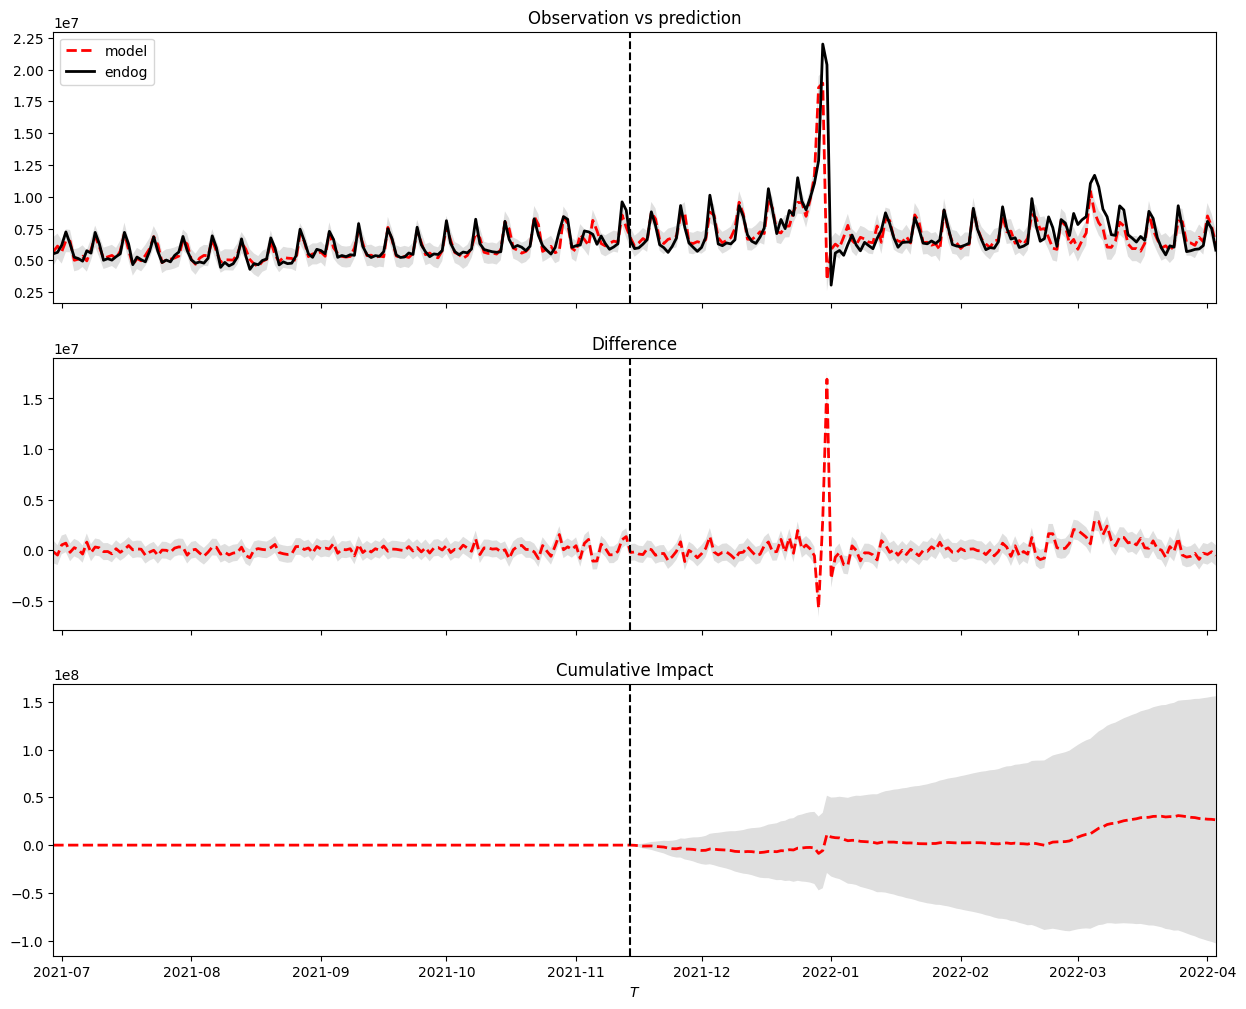

During the post-intervention period, the response             variable had an average value of             approx.
7477070.  By contrast, in  the absence of an intervention, we would have expected an average response of 7288134. The
95% interval of this counterfactual prediction is [6365037, 8211231]. Subtracting this prediction from the observed
response yields an estimate of the causal effect the intervention had on the response variable. This effect is 188936
with a 95% interval of [1112033, -734161]. For a discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 1046789871.  By contrast, had  the intervention not taken
place, we would have expected a sum of 1020338829. The 95% interval of this prediction is [891105207, 1149572452]


 The above results are given in terms of absolute numbers. In relative te

In [67]:
ts_impact = CausalImpact(ts_data_redeemer, ts_pre_period, ts_post_period)
ts_impact.run()
ts_impact.plot()
ts_impact.summary(output="report")

Voor nu, lijkt het alsof de non-redeemers minder zijn gaan uitgeven tijdens deze periode terwijl de redeemers juist meer zijn gaan uitgeven

### revenue non-redeemer toegevoegd aan redeemer 

Om effect van gedrag niet gerelateerd aan LP zoals andere acties eruit te halen  

In [68]:
ts_data_redeemer

,date,revenue,close,searches,revenue_after_discount_incl_vat
0,2021-06-28,5393629.42,4290.61,45.0,4956504.09
1,2021-06-29,5520279.17,4291.80,45.0,5269910.69
2,2021-06-30,5627010.40,4297.50,45.0,5809338.42
3,2021-07-01,6186093.92,4319.94,45.0,5487706.57
4,2021-07-02,7232717.65,4352.34,45.0,6241568.58
...,...,...,...,...,...
275,2022-03-30,5897735.65,4602.45,49.0,5922999.77
276,2022-03-31,6157865.26,4530.41,49.0,5617071.67
277,2022-04-01,8065175.57,4545.86,49.0,7750856.34
278,2022-04-02,7490171.63,4545.86,49.0,6862600.02


In [63]:
without = revenue_df_without.set_index('date')
without

,revenue
date,
2021-06-28,3126528.03
2021-06-29,2878017.28
2021-06-30,3106214.77
2021-07-01,3126854.11
2021-07-02,4059050.58
...,...
2022-03-30,2754026.71
2022-03-31,2765346.68
2022-04-01,3617783.94


In [64]:
# non redeemers toevoegen aan casual impact van redeemers



test = pd.merge(ts_data_redeemer, without, how='outer', left_on='date', right_index=True)


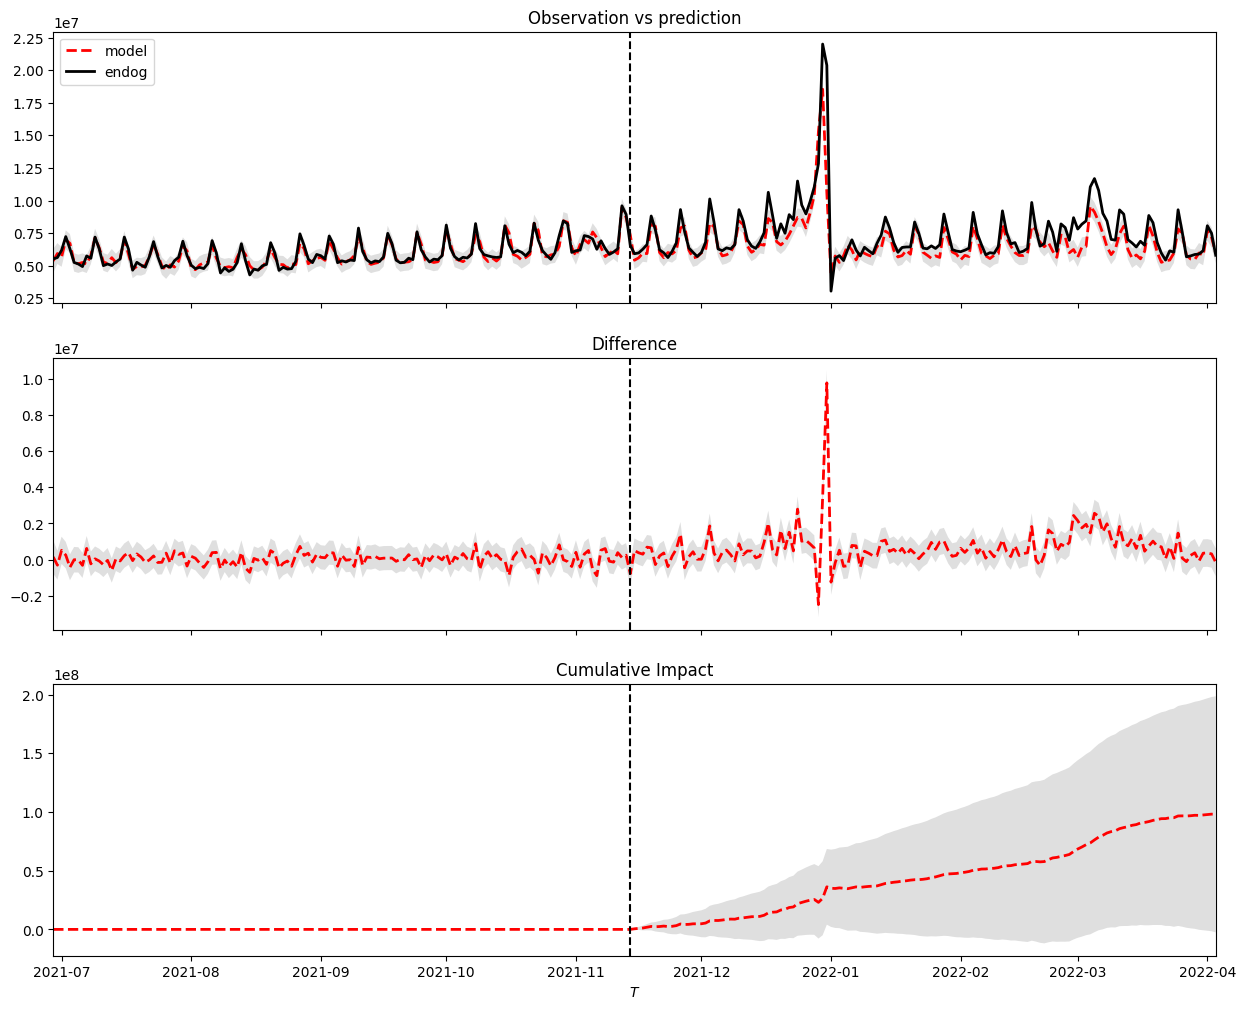

During the post-intervention period, the response             variable had an average value of             approx.
7477070.  By contrast, in  the absence of an intervention, we would have expected an average response of 6777097. The
95% interval of this counterfactual prediction is [6059232, 7494962]. Subtracting this prediction from the observed
response yields an estimate of the causal effect the intervention had on the response variable. This effect is 699972
with a 95% interval of [1417837, -17891]. For a discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 1046789871.  By contrast, had  the intervention not taken
place, we would have expected a sum of 948793672. The 95% interval of this prediction is [848292604, 1049294739]


 The above results are given in terms of absolute numbers. In relative term

In [69]:
ts_impact = CausalImpact(test, ts_pre_period, ts_post_period)
ts_impact.run()
ts_impact.plot()
ts_impact.summary(output="report")